In [30]:
import os
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [31]:
directory = r"C:\Users\kamal\BeginnerImageClassification\Dataset"
categories = ['Mask', 'No Mask']
dataset = []
for category in categories:
    path = os.path.join(directory,category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        data_img = cv2.imread(imgpath,0)
        try:
            data_img = cv2.resize(data_img,(50,50))
            image = np.array(data_img).flatten()
            dataset.append([image,label])
        except Exception as e:
            pass

In [32]:
print(len(dataset))

101


In [33]:
#Randomising the dataset above
import random
random.shuffle(dataset)
features = []
labels = []
for feature,label in dataset:
    features.append(feature)
    labels.append(label)

In [47]:
#Spilt into training and testing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.20)
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(X_train,Y_train)

SVC(C=1, gamma='auto', kernel='poly')

Accuracy :  80.95238095238095 %
Not wearing mask


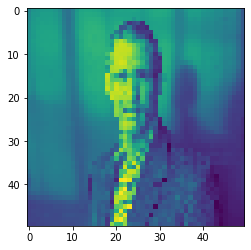

In [48]:
predictions = model.predict(X_test)

#Calculate the accuracy score
accuracy = (model.score(X_test,Y_test) * 100)
print("Accuracy : ", accuracy, "%")

#Printing the results to check the value
sample = predictions[2]
if(sample == 0):
    print("Wearing mask")
else:
    print("Not wearing mask")
    
sample_image = X_test[2].reshape(50,50)
plt.imshow(sample_image)
plt.show()

Accuracy :  76.19047619047619 %
Not wearing mask


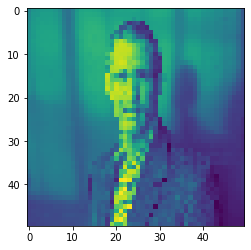

In [49]:
#Preparing and test classifier using Naive Bayes

from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train,Y_train)
predictions2 = model2.predict(X_test)
#Calculate the accuracy score
accuracy = (model2.score(X_test,Y_test) * 100)
print("Accuracy : ", accuracy, "%")

#Printing the results to check the value
sample = predictions2[2]
if(sample == 0):
    print("Wearing mask")
else:
    print("Not wearing mask")
    
sample_image = X_test[2].reshape(50,50)
plt.imshow(sample_image)
plt.show()